In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt

import librosa as lr
from glob import glob

In [ ]:
# audio, sfreq = lr.load('./files/normal__201101070538.wav')
# ixs = np.arange(audio.shape[-1])
# time = ixs / sfreq

# means = np.mean(audio, axis=-1)
# maxs = np.max(audio, axis=-1)
# stds = np.std(audio, axis=-1)

# normal = pd.DataFrame({ "time": time, "4": means, "5": maxs, "6": stds })[:10000]
# normal = normal.set_index("time")


# audio, sfreq = lr.load('./files/murmur__201108222231.wav')
# ixs = np.arange(audio.shape[-1])
# time = ixs / sfreq

# means = np.mean(audio, axis=-1)
# maxs = np.max(audio, axis=-1)
# stds = np.std(audio, axis=-1)

# abnormal = pd.DataFrame({ "time": time, "4": means, "5": maxs, "6": stds })
# abnormal = abnormal.set_index("time")

## Many repetitions of sounds

### In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

### You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

### Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.

### Instructions
-    First, create the time array for these audio files (all audios are the same length).
-    Then, stack the values of the two DataFrames together (normal and abnormal, in that order) so that you have a single array of shape (n_audio_files, n_times_points).
-    Finally, use the code provided to loop through each list item / axis, and plot the audio over time in the corresponding axis object.
-    You'll plot normal heartbeats in the left column, and abnormal ones in the right column

In [56]:
normal = {}
i = 0

file_names = [ "./files/normal__201101070538.wav", "./files/normal__201101151127.wav", "./files/normal__201102081152.wav" ]
for file in file_names:
    audio, sfreq = lr.load(file)
    ixs = np.arange(audio.shape[-1])
    time = ixs / sfreq
    normal["time"] = time[:100000]
    normal[str(i)] = audio[:100000]
    i += 1


normal = pd.DataFrame(normal)
normal = normal.set_index("time")

In [57]:
abnormal = {}
i = 0

file_names = [ "./files/murmur__201101051104.wav", "./files/murmur__201101051108.wav", "./files/murmur__201101051114.wav" ]
for file in file_names:
    audio, sfreq = lr.load(file)
    ixs = np.arange(audio.shape[-1])
    time = ixs / sfreq
    abnormal["time"] = time[:100000]
    abnormal[str(i)] = audio[:100000]
    i += 1

abnormal = pd.DataFrame(abnormal)
abnormal = abnormal.set_index("time")

In [58]:
def show_plot_and_make_titles():
   axs[0, 0].set(title="Normal Heartbeats")
   axs[0, 1].set(title="Abnormal Heartbeats")
   plt.tight_layout()
   plt.show()

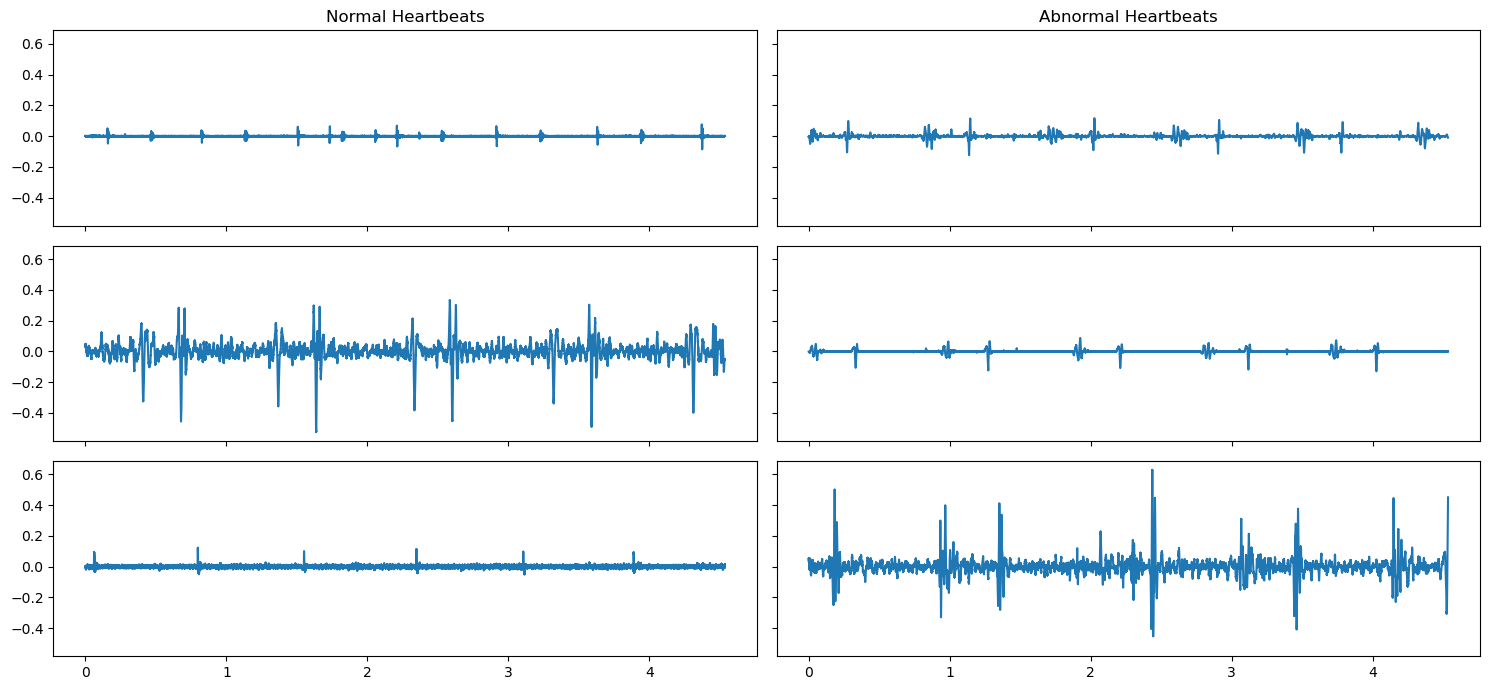

In [59]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

## Invariance in time

### While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.

### Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

### In this exercise, you'll average across many instances of each class of heartbeat sound.

### The two DataFrames (normal and abnormal) and the time array (time) from the previous exercise are available in your workspace.

### Instructions
-    Average across the audio files contained in normal and abnormal, leaving the time dimension.
-    Visualize these averages over time.

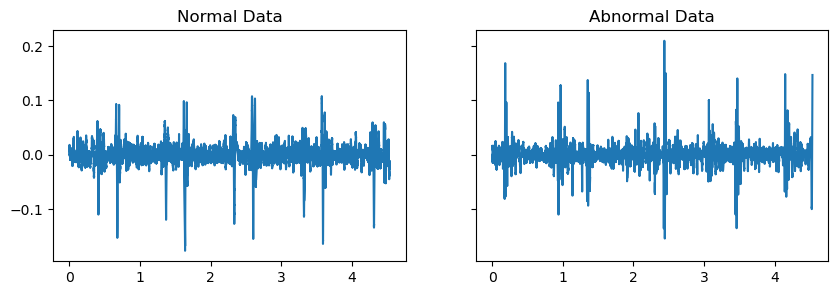

In [60]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

## Build a classification model

### While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

### We've split the two DataFrames (normal and abnormal) into X_train, X_test, y_train, and y_test.

### Instructions
-    Create an instance of the Linear SVC model and fit the model using the training data.
-    Use the testing data to generate predictions with the model.
-    Score the model using the provided code.

In [6]:
'''
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))
'''

'\nfrom sklearn.svm import LinearSVC\n\n# Initialize and fit the model\nmodel = LinearSVC()\nmodel.fit(X_train, y_train)\n\n# Generate predictions and score them manually\npredictions = model.predict(X_test)\nprint(sum(predictions == y_test.squeeze()) / len(y_test))\n'

## Calculating the envelope of sound

### One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy over time is more distinguishable. You'll do this in the current exercise.

### A heartbeat file is available in the variable audio.

### Instructions 1/3
-    Visualize the raw audio you'll use to calculate the envelope.

In [7]:
audio = pd.DataFrame({ "time": time, "audio": audio })
audio = audio.set_index("time")

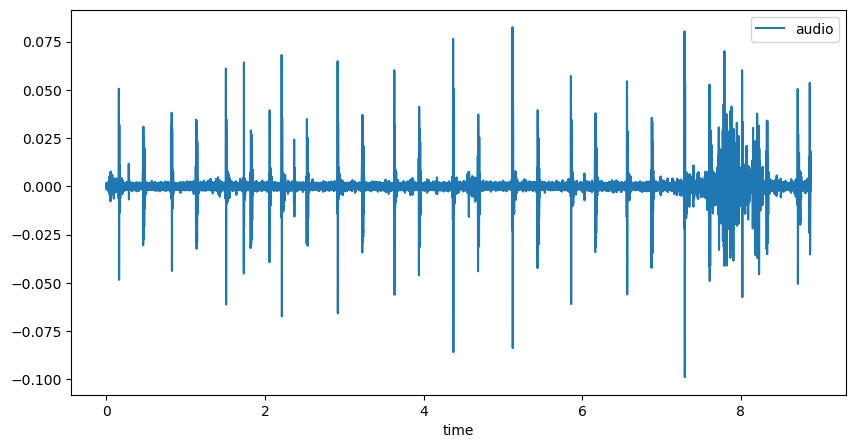

In [8]:
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

### Instructions 2/3
-    Rectify the audio.
-    Plot the result.

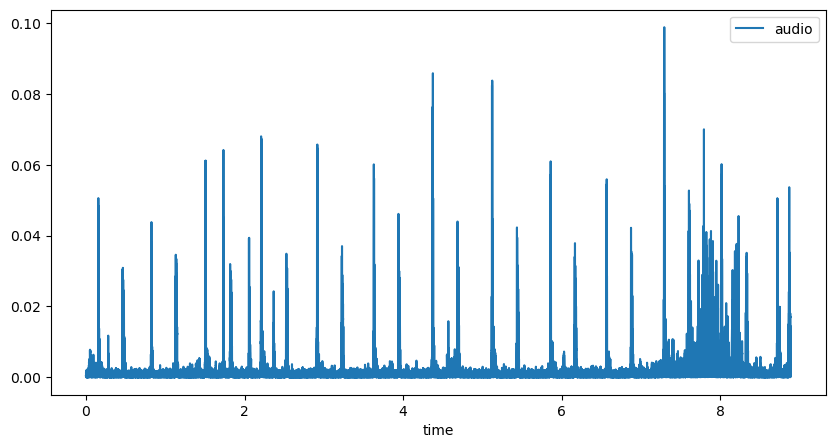

In [9]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

### Instructions 3/3
-    Smooth the audio file by applying a rolling mean.
-    Plot the result.

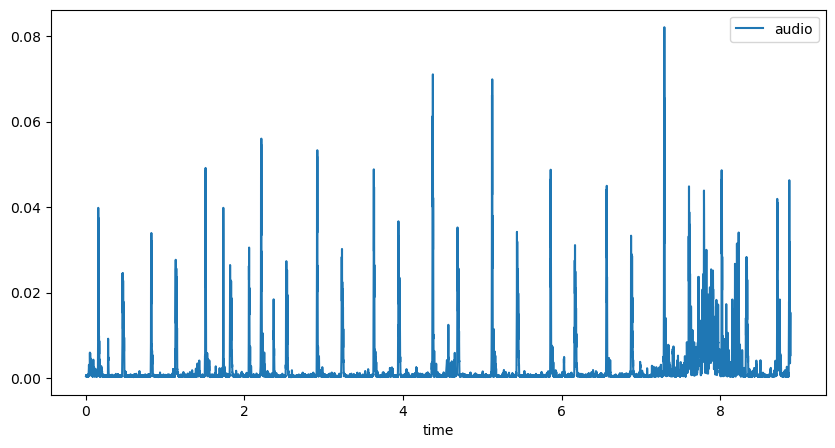

In [10]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

## Calculating features from the envelope

### Now that you've removed some of the noisier fluctuations in the audio, let's see if this improves your ability to classify.

### audio_rectified_smooth from the previous exercise is available in your workspace.

### Instructions
-    Calculate the mean, standard deviation, and maximum value for each heartbeat sound.
-    Column stack these stats in the same order.
-    Use cross-validation to fit a model on each CV iteration.

In [15]:
model = LinearSVC()

labels = np.array(['murmur', 'murmur', 'murmur', 'normal', 'normal', 'murmur', 'normal', 'normal', 'murmur', 'murmur', 'normal', 'murmur',
       'normal', 'murmur', 'murmur', 'normal', 'normal', 'normal', 'normal', 'murmur', 'normal', 'normal', 'murmur', 'murmur',
       'normal', 'normal', 'normal', 'normal', 'murmur', 'murmur', 'murmur', 'normal', 'normal', 'normal', 'normal', 'murmur',
       'murmur', 'murmur', 'normal', 'normal', 'normal', 'murmur', 'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur',
       'normal', 'normal', 'murmur', 'normal', 'normal', 'murmur', 'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur'])

In [17]:
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
#percent_score = cross_val_score(model, X, y, cv=5)
#print(np.mean(percent_score))

## Derivative features: The tempogram

### One benefit of cleaning up your data is that it lets you compute more sophisticated features. For example, the envelope calculation you performed is a common technique in computing tempo and rhythm features. In this exercise, you'll use librosa to compute some tempo and rhythm features for heartbeat data, and fit a model once more.

### Note that librosa functions tend to only operate on numpy arrays instead of DataFrames, so we'll access our Pandas data as a Numpy array with the .values attribute.

### Instructions 1/2
-    Use librosa to calculate a tempogram of each heartbeat audio.
-    Calculate the mean, standard deviation, and maximum of each tempogram (this time using DataFrame methods)

In [ ]:
'''
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)
'''

### Instructions 2/2
-    Column stack these tempo features (mean, standard deviation, and maximum) in the same order.
-    Score the classifier with cross-validation.

In [ ]:
'''
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))
'''

## Spectrograms of heartbeat audio

### Spectral engineering is one of the most common techniques in machine learning for time series data. The first step in this process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.

### We've loaded a single heartbeat sound in the variable audio.

### Instructions 1/2
-    Import the short-time fourier transform (stft) function from librosa.core.
-    Calculate the spectral content (using the short-time fourier transform function) of audio.

In [ ]:
'''
# Import the stft function
from librosa.core import stft

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)
'''

### Instructions 2/2
-    Convert the spectogram (spec) to decibels.
-    Visualize the spectogram.

In [ ]:
'''
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=axs[1])
plt.show()
'''

## Engineering spectral features

### As you can probably tell, there is a lot more information in a spectrogram compared to a raw audio file. By computing the spectral features, you have a much better idea of what's going on. As such, there are all kinds of spectral features that you can compute using the spectrogram as a base. In this exercise, you'll look at a few of these features.

### The spectogram spec from the previous exercise is available in your workspace.

### Instructions 1/2
-    Calculate the spectral bandwidth as well as the spectral centroid of the spectrogram by using functions in librosa.feature.

In [ ]:
'''
import librosa as lr

# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]
'''

### Instructions 2/2
-    Convert the spectrogram to decibels for visualization.
-    Plot the spectrogram over time.

In [ ]:
'''
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()
'''

## Combining many features in a classifier

### You've spent this lesson engineering many features from the audio data - some contain information about how the audio changes in time, others contain information about the spectral content that is present.

### The beauty of machine learning is that it can handle all of these features at the same time. If there is different information present in each feature, it should improve the classifier's ability to distinguish the types of audio. Note that this often requires more advanced techniques such as regularization, which we'll cover in the next chapter.

### For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into an array that can be fed into the classifier, and see how it does.

### Instructions 1/2
-    Loop through each spectrogram, calculating the mean spectral bandwidth and centroid of each.

In [ ]:
'''
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)
'''

### Instructions 2/2
-    Column stack all the features to create the array X.
-    Score the classifier with cross-validation.

In [ ]:
'''
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))
'''